# Morfología matemática binaria

En este tutorial implementaremos múltiples operaciones morfológicas entre imágenes binarias a partir de la propiedad de dualidad entre la dilatación y la erosión. Posteriormente, emplearemos estas operaciones en tareas útiles en el análisis y procesamiento de imágenes como la extracción de contornos, el relleno de huecos y la extracción de componentes conexos.

## Dilatación 

La dilatación es una transformación morfológica, por lo tanto, y como se vio en clase, consiste en un análisis píxel a píxel empleando un elemento estructurante. La definición matemática de la dilatación está dada por la siguiente expresión:


<div>
<img src="def_dilatacion.png" width="250"/>
</div>


Esto se puede leer como todas las posibles traslaciones del origen de $\hat{B}$ tales que $A$ y $\hat{B}$ se sobreponen en **al menos un píxel.**

En pocas palabras, visualmente, la dilatacion consiste en que si el píxel central del elemento estructurante (B) coincide con un píxel del objeto (A), todos los píxeles recubiertos por B tomarán el mismo valor de los píxeles de A. Esto implica que la dilatación permite ensanchar los bordes de un objeto utilizando sus píxeles más cercanos en una o más direcciones. En términos prácticos, la dilatación aumenta el tamaño, rellena huecos y rellena bahías en los objetos. Adicionalmente, puede conectar objetos cercanos entre ellos.

En este taller, al basarse en morfología binaria, adoptaremos la convención que los píxeles pertenecientes a un objeto de interés tendrán una intensidad de 1. A continuación, se presenta una implementación de una función que retorna el resultado de la dilatación de una imagen empleando un elemento estructurante ingresado como parámetro:

In [1]:
import numpy as np

# Parámetros:
# A: Imagen con objetos de interés marcados con intensidad 1
# B: Elemento estructurante. Sus dimensiones deben ser impares de tal forma que tenga un píxel central

def binary_dilatation(A, B):
    
    # Obtención de variables auxiliares
    m, n = B.shape
    a, b = (m - 1)//2, (n - 1)//2
    
    # Imagen con borde de ceros que permita central el elemento estructurante en aristas y vertices
    A_pad = np.block([[np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))],
                      [np.zeros((A.shape[0], b)),         A,                   np.zeros((A.shape[0], b))],
                      [np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))]])
    
    # Arreglo en el que se almacenará el resultado de la dilatación sobre la imagen con borde
    result_pad = np.copy(A_pad)
    
    # Para cada pixel del arreglo original
    for x in range(A.shape[0]):
        for y in range(A.shape[1]):
            # Cambio de coordenadas a la imagen con borde
            x_pad = x + a
            y_pad = y + b
            # Si el pixel en el que se centra el elemento estructurante es igual a 1
            if A_pad[x_pad, y_pad] == 1:
                # La imagen resultante tiene intensidad 1 en cada pixel sea 1 en la
                # imagen original o en el elemento estructurante
                result_pad[x_pad - a:x_pad + a + 1, y_pad - b: y_pad + b + 1] = np.logical_or(
                result_pad[x_pad - a:x_pad + a + 1, y_pad - b: y_pad + b + 1], B)
                
    # El resultado corresponde al arreglo sin borde para que se conserven las dimensiones de la imagen original
    result = result_pad[a: -a, b: -b]
    return result

A continuación, se ilustra el resultado de aplicar una dilatación empleando la función definida previamente sobre dos imágenes con elementos estructurantes distintos:

C:\Users\eduar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


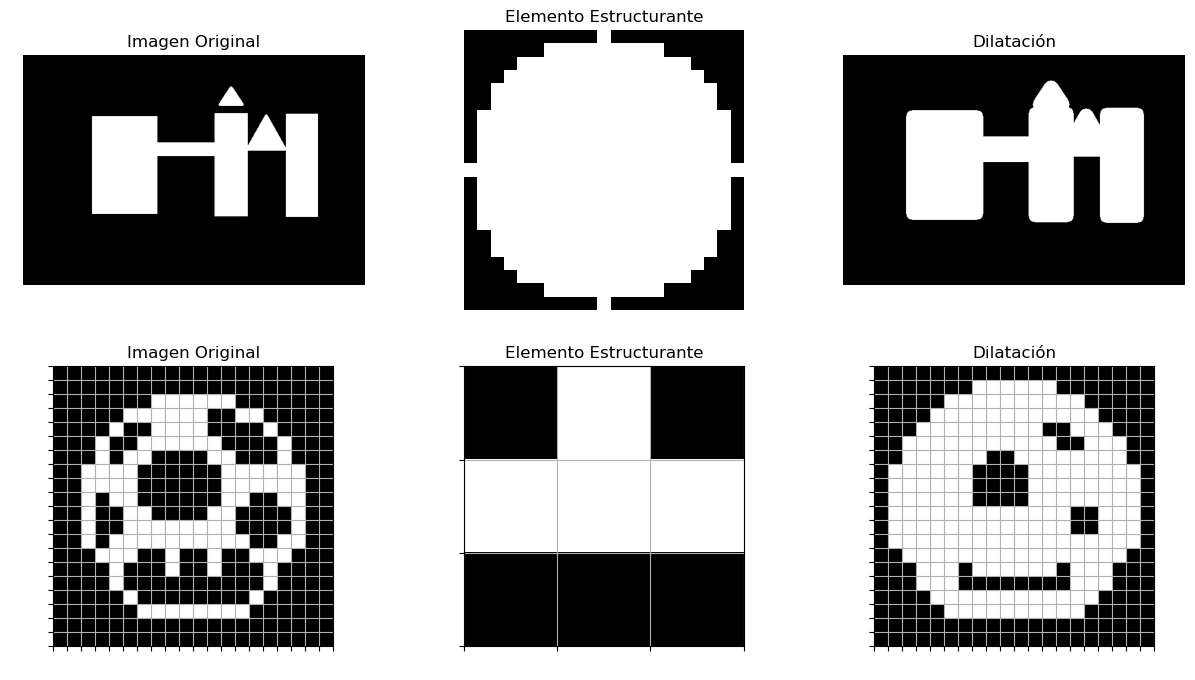

In [2]:
from skimage.io import imread
import skimage.morphology as morph
import matplotlib.pyplot as plt

# Se leen las imagenes con los objetos de interés
geometry_img = imread('geometry.png', as_gray=True)
toad_img = imread('toad.png', as_gray=True)

# Se obtienen los elementos estructurantes a emplear
str_element_1 = morph.disk(10)
str_element_2 = np.array([[0,1,0],
                        [1,1,1],
                        [0,0,0]])

# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Dilatación')
plt.imshow(binary_dilatation(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Dilatación')
plt.imshow(binary_dilatation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

Existe una implementación de la dilatación en la librería skimage.morphology.

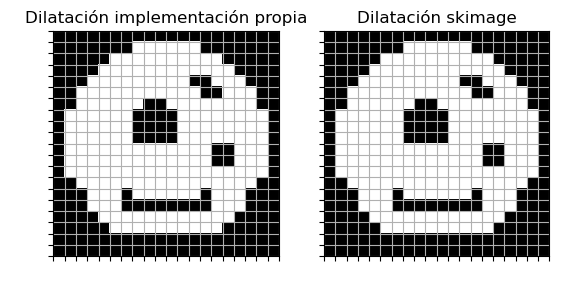

In [3]:
from skimage.morphology import binary_dilation as dilation

plt.subplot(121)
plt.title('Dilatación implementación propia')
plt.imshow(binary_dilatation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(122)
plt.title('Dilatación skimage')
plt.imshow(dilation(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Erosión

La definición matemática de la erosión está dada por la siguiente expresión:

<div>
<img src="def_erosion-2.png" width="200"/>
</div>

Esto se puede leer como *todas las posibles posiciones del origen de $B$ tales que $B$ está completamente contenido en $A$*.

En pocas palabras, la erosión consiste en que si todo el elemento estructurante está contenido por el objeto, únicamente el píxel central tomará el valor de los píxeles de A. La erosión elimina los píxeles más cercanos a un objeto en una o más direcciones (adelgaza los bordes). En términos prácticos, la erosión remueve puntos aislados y partículas pequeñas, adelgaza y desconecta objetos, y elimina picos en sus contornos.

Sin embargo, a partir de las definiciones matemáticas provistas anteriormente podemos decir que la dilatación y la erosión son operaciones duales. Esta dualidad implica que se cumple la siguiente igualdad:

<div>
<img src="dualidad.png" width="200"/>
</div>

donde $A^C$ corresponde al complemento del conjunto representado por $A$, y $\hat{B}$ corresponde al elemento estructurante reflejado con respecto a su origen. 

### Ejercicio 1:
A continuación, emplearemos esta dualidad para implementar una función que lleve a cabo la erosión partiendo de nuestra función creada para la dilatación. Esta función tendrá como parametro una imagen binaria y su elemento estructurante. Retorne la imagen erosionada, el elemento estructurante reflejado y el complemento de la imagen original.

In [4]:
def binary_erosion(A, B):
    # YOUR CODE HERE
    
    A_c = np.logical_not(A)
    B_flip = np.flip(B)
    dil = binary_dilatation(A_c, B_flip)
    result = np.logical_not(dil).astype(int)
    return result, A_c, B_flip

A continuación, se ilustra el resultado de aplicar una erosión sobre las dos imágenes previas con los mismos elementos estructurantes:

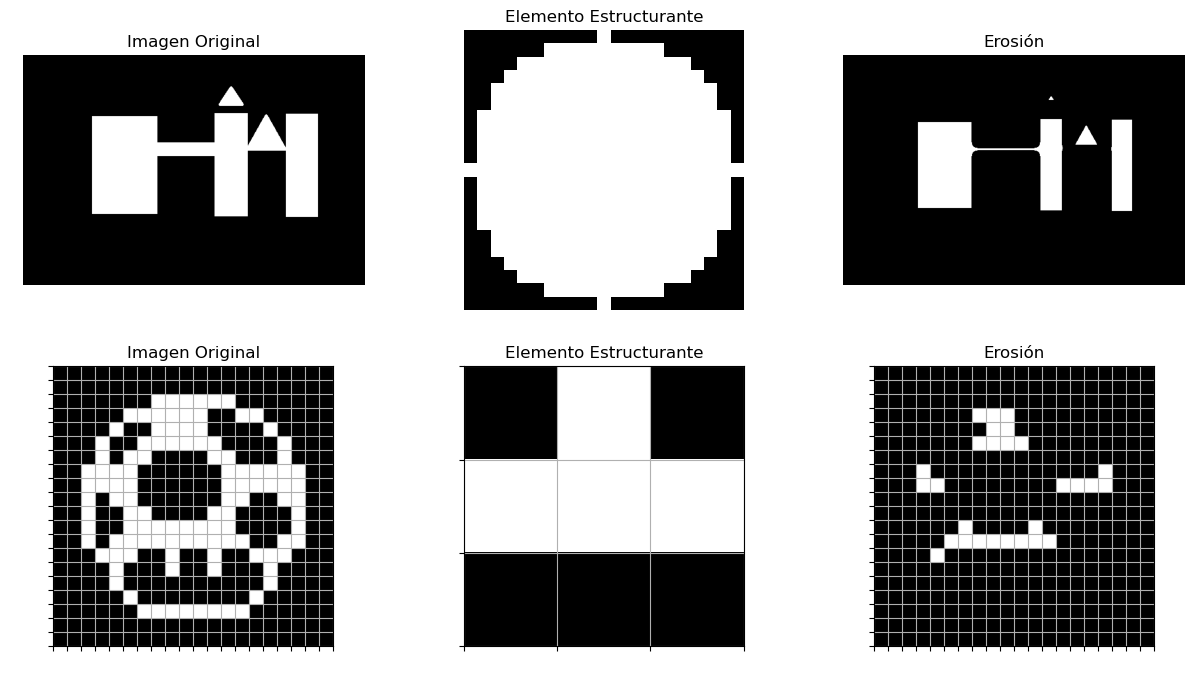

In [5]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Erosión')
plt.imshow(binary_erosion(geometry_img, str_element_1)[0], cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Erosión')
plt.imshow(binary_erosion(toad_img, str_element_2)[0], cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

Existe una implementación de la erosión en la librería skimage.morphology.

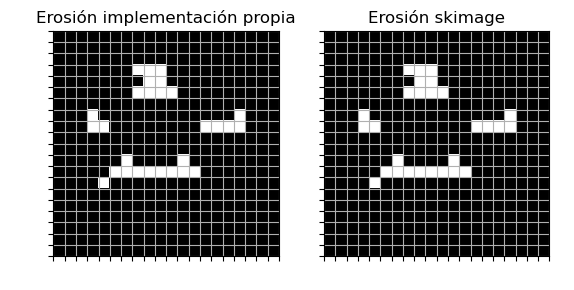

In [6]:
from skimage.morphology import binary_erosion as erosion

plt.subplot(121)
plt.title('Erosión implementación propia')
plt.imshow(binary_erosion(toad_img, str_element_2)[0], cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(122)
plt.title('Erosión skimage')
plt.imshow(erosion(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

In [7]:
result,A_c,B_flip=binary_erosion(geometry_img,str_element_2)

assert np.isclose(np.sum(A_c),180209.0), f'El complemento de la image original es erroneo, el area debería ser 180209 y es {np.sum(A_c)}'
assert len(B_flip.shape)==2, 'Su elemento estructurante debería tener solo 2 dimensiones'
assert B_flip.shape[0]==B_flip.shape[1], 'Su elemento estructurante debería tener las mismas dimensiones de filas y columnas'
assert np.sum(str_element_2*B_flip)==3, 'Su elemento esctructurante fue mal reflejado'
assert np.isclose(np.sum(result-erosion(geometry_img, str_element_2)),0,0.01), 'Su implementación es erronea, debería ser igual la erosión propia a la de skimage'

## Apertura
La definición matemática de la apertura está dada por la siguiente expresión:

<div>
<img src="def_apertura.png" width="250"/>
</div>

Esto se puede leer como *la unión de todas las posibles traslaciones de $B$ que caen dentro de $A$*.

En pocas palabras, la apertura consiste en que si todo el elemento estructurante está contenido por el objeto, todos los píxeles cubiertos por el elemento estructurante seguirán perteneciendo al objeto. La apertura es similar a la erosión, pero preserva más información. Esta operación desecha objetos pequeños, mantiene objetos grandes con una forma muy similar, remueve pequeños detalles en el contorno, y puede desconectar algunas partículas y zonas de un objeto.

Es importante resaltar que la apertura es el resultado de aplicar una erosión seguida de una dilatación con el mismo elemento estructurante. Esto nos permite implementar de forma sencilla esta operación a partir de las funciones ya definidas:

In [8]:
def binary_opening(A, B):
    eroded = erosion(A, B)
    opening = dilation(eroded, B)
    return opening

A continuación, se ilustra el resultado de aplicar una apertura sobre las dos imágenes previas con los mismos elementos estructurantes:

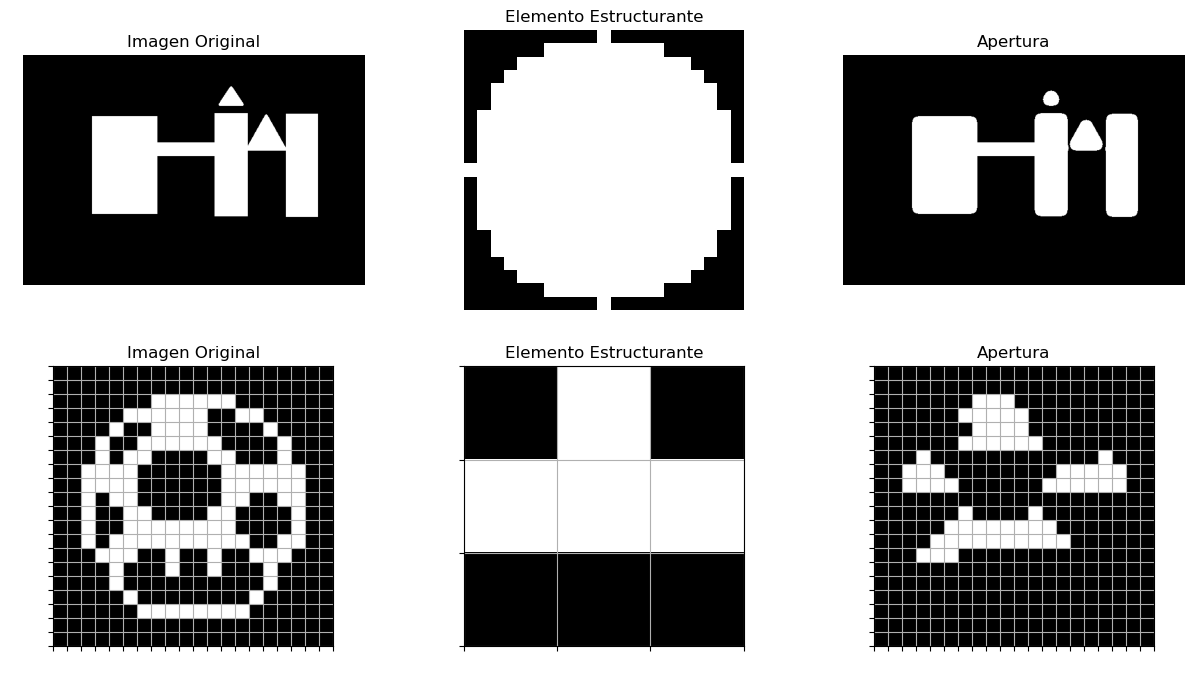

In [9]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Apertura')
plt.imshow(binary_opening(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Apertura')
plt.imshow(binary_opening(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

### Ejercicio 2:

Ahora, basemonos en la expresión en conjuntos para crear la apertura a partir de esta. Como dijimos anteriormente, la apertura es toda bola B que esta completamente contenida en A. Cree una función que tenga como parametro la imagen binaria y el elemento estructurante B. Esta función deberá "pintar" el elemento estructurante B si esta comletamente contenido en A para todo el arreglo. De esta forma, la función retornará la apertura de A con el elemento B, tambien debe retornar la cantidad de veces que B estuvo completamente conenido en A. 

>- **Nota**: basese en la función binary_dilatation que se implementó anteriormente. Note que lo importante de esta implementación es el result_pad (nuestra imagen objetivo) y la condición de pintado del elemento B.

In [10]:
def Apertura_conjuntos(A, B):
    # YOUR CODE HERE
    
    # Obtención de variables auxiliares
    m, n = B.shape
    a, b = (m - 1)//2, (n - 1)//2
    
    # Imagen con borde de ceros que permita central el elemento estructurante en aristas y vertices
    A_pad = np.block([[np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))],
                      [np.zeros((A.shape[0], b)),         A,                   np.zeros((A.shape[0], b))],
                      [np.zeros((a, b)),         np.zeros((a, A.shape[1])),    np.zeros((a, b))]])
    
    # Arreglo en el que se almacenará el resultado de la dilatación sobre la imagen con borde
    result_pad = np.zeros(A_pad.shape)
    contador = 0
    # Para cada pixel del arreglo original
    for x in range(A.shape[0]):
        for y in range(A.shape[1]):
            # Cambio de coordenadas a la imagen con borde
            x_pad = x + a
            y_pad = y + b
            
            region = A_pad[x_pad - a:x_pad + a + 1, y_pad - b:y_pad + b + 1]

            # Si está completamente adentro (la cross-correlación es igual a la suma), se pinta
            if np.sum(np.multiply(region, B)) == np.sum(B):
                contador += 1
                result_pad[x_pad - a:x_pad + a + 1, y_pad - b:y_pad + b + 1] = np.logical_or(
                    result_pad[x_pad - a:x_pad + a + 1, y_pad - b:y_pad + b + 1], B)
                
    # El resultado corresponde al arreglo sin borde para que se conserven las dimensiones de la imagen original
    result = result_pad[a: -a, b: -b]
    return result, contador

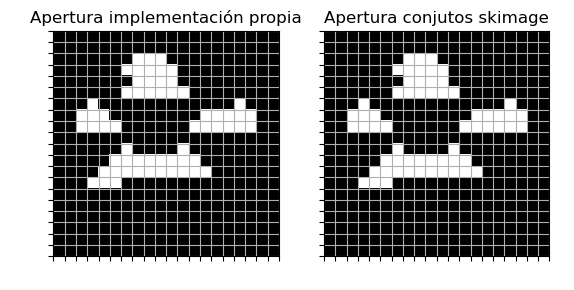

In [11]:
plt.subplot(121)
plt.title('Apertura implementación propia')
plt.imshow(binary_opening(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(122)
plt.title('Apertura conjutos skimage')
plt.imshow(Apertura_conjuntos(toad_img, str_element_2)[0], cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

In [12]:
resultado,contador=Apertura_conjuntos(toad_img, str_element_2)
assert not np.sum((binary_opening(toad_img, str_element_2)-resultado)), 'Su implementación de la apertura por conjuntos no es igual a la erosión seguida de la dilatación'
assert contador==28, f'La cantidad de puntos donde el elemento estructurante que caben completamente es 28 y en su implementación es {contador}'

resultado,contador=Apertura_conjuntos(toad_img, str_element_2*str_element_2[::-1,:])
assert contador==48, f'La cantidad de puntos donde el elemento estructurante que caben completamente es 28 y en su implementación es {contador}'

## Clausura

La clausura es la operación dual de la apertura. Esta operación equivale a aplicar una dilatación seguida de una erosión. Su resultado corresponde al conjunto de píxeles no recubiertos por el elemento estructurante cuando éste permanece enteramente fuera del objeto. Esta operación permite principalmente suavizar los contornos del objeto, rellenando las bahías. Debido a esto, podemos entender a la clausura como *todas las posibles traslaciones de $B$ que no se situan sobre $A$*. La dualidad entre clausura y apertura se puede expresar a través de la siguiente igualdad:

<div>
<img src="dualidad2.png" width="250"/>
</div>

A continuación, se presenta una implementación de la clausura a partir de las operaciones de dilatación y erosión:

In [13]:
from skimage.morphology import binary_erosion as erosion
from skimage.morphology import binary_dilation as dilation

def binary_closing(A, B):
    dilated = dilation(A, B)
    closing = erosion(dilated, B)
    return closing

A continuación, se ilustra el resultado de aplicar una clausura sobre las dos imágenes previas con los mismos elementos estructurantes:

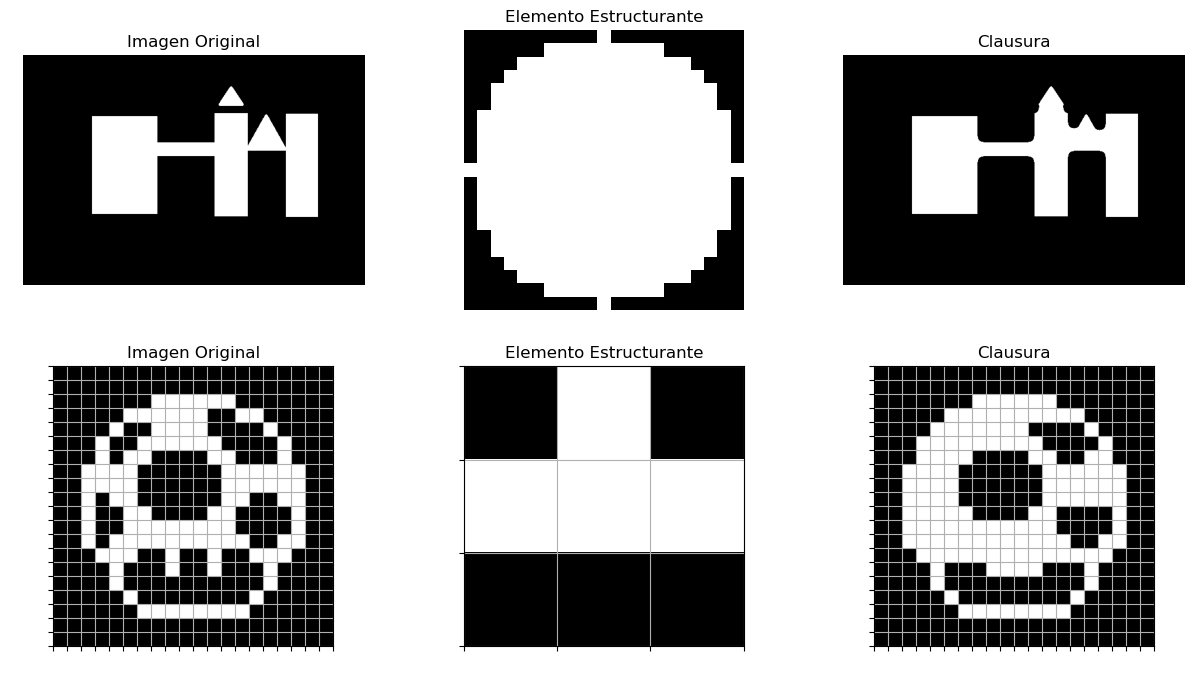

In [14]:
# Visualización de Resultados
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title('Imagen Original')
plt.imshow(geometry_img, cmap='gray')
plt.axis('Off')

plt.subplot(232)
plt.title('Elemento Estructurante')
plt.imshow(str_element_1, cmap='gray')
plt.axis('Off')

plt.subplot(233)
plt.title('Clausura')
plt.imshow(binary_closing(geometry_img, str_element_1), cmap='gray')
plt.axis('Off')

plt.subplot(234)
plt.title('Imagen Original')
plt.imshow(toad_img, cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

plt.subplot(235)
plt.title('Elemento Estructurante')
plt.imshow(str_element_2, cmap='gray')
plt.xticks(np.arange(-.5, 3, 1), color='w')
plt.yticks(np.arange(-.5, 3, 1), color='w')
plt.grid()

plt.subplot(236)
plt.title('Clausura')
plt.imshow(binary_closing(toad_img, str_element_2), cmap='gray')
plt.xticks(np.arange(-.5, 20, 1), color='w')
plt.yticks(np.arange(-.5, 20, 1), color='w')
plt.grid()

## Extracción de Contornos

Las operaciones morfológicas nos permiten extraer los contornos de una imagen binaria de forma sencilla. Esto se puede obtener al restar una erosión (con un elemento estructurante adecuado) a la imagen original, cuya expresión sería la siguiente:

<div>
<img src="contorno.png" width="250"/>
</div>

En términos prácticos esto puede parecer poco útil, ya que las imágenes naturales no tienden a ser binarias. Sin embargo, una vez se obtiene una máscara de segmentación de un objeto de interés mediante un método más complejo, esta operación resulta útil. Por ejemplo, tal como se muestra a continuación, una objeto de interés en una imagen bimodal puede segmentarse mediante umbralización por el método de otsu, y se puede extraer su contorno mediante la operación morfológica previamente descrita. Como base, se empleará la siguiente imagen:

<img src="wolf.jpg" width="500"/>

(-0.5, 394.5, 262.5, -0.5)

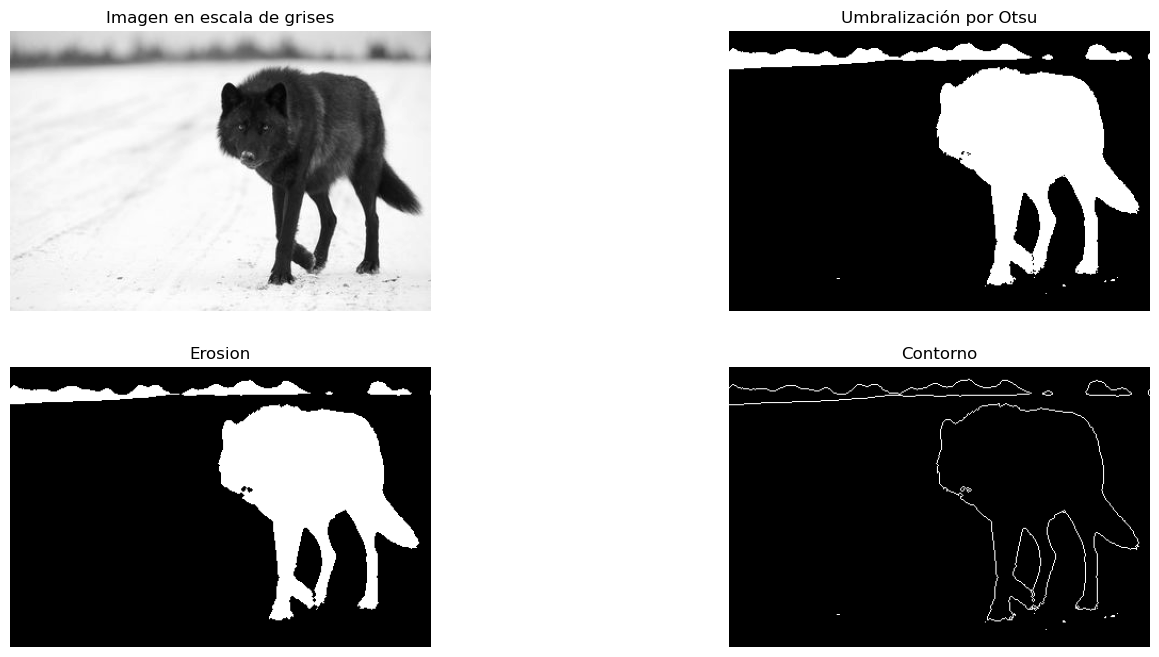

In [15]:
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

wolf_img = imread('wolf.jpg')
wolf_img_gray = rgb2gray(wolf_img)
thr_otsu = threshold_otsu(wolf_img_gray)
obj = (wolf_img_gray < thr_otsu).astype(int)
str_element_3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]])
erosion = binary_erosion(obj, str_element_3)[0]
contour = obj - erosion

plt.figure(figsize=(17, 8))
plt.subplot(221)
plt.title("Imagen en escala de grises")
plt.imshow(wolf_img_gray, cmap="gray")
plt.axis('Off')

plt.subplot(222)
plt.title("Umbralización por Otsu")
plt.imshow(obj, cmap="gray")
plt.axis('Off')

plt.subplot(223)
plt.title("Erosion")
plt.imshow(erosion, cmap='gray')
plt.axis('Off')

plt.subplot(224)
plt.title("Contorno")
plt.imshow(contour, cmap='gray')
plt.axis('Off')

Si bien después de la umbralización los árboles del fondo de la imagen fueron incluidos en la máscara de segmentación, en términos generales mediante este método morfológico se logró extraer un contorno adecuado para el lobo, siendo este nuestro objeto de interés. Además de extraer el contorno, podemos obtener el gradiente morfológico de la imagen según lo visto en clase.
> recuere que para esta operacion debe usar imagwenesen escla degris, no binarias

In [16]:
from skimage.morphology import dilation,erosion,opening, closing
def morph_gradient(gray_img,EE):

    dil = dilation(gray_img,EE)
    ero = erosion(gray_img,EE)
    return dil-ero

## White top hat
Las operaciones morfologicas nos permiten analizar conjuntos complejos usando conjuntos simples que conocemos. De esta forma podemos extarer información de una imagen usado no solo sus intensidades, sino tambien el tamaño y la forma.

El white top hat es una operación morfologica que nos permite obtener los objetos brillantes más pequeños que el elemento estructurante. Esta operación se define como:

$W=I-I\circ B$

### Ejercicio 3:

Cree una función que entre como parametro una imagen I y un elemento estructurante B, esta función debe retornar el White top hat de la imagen.

In [17]:
def W_th(I,B):
    # YOUR CODE HERE
    W = I - opening(I, B)
    return W

(-0.5, 749.5, 419.5, -0.5)

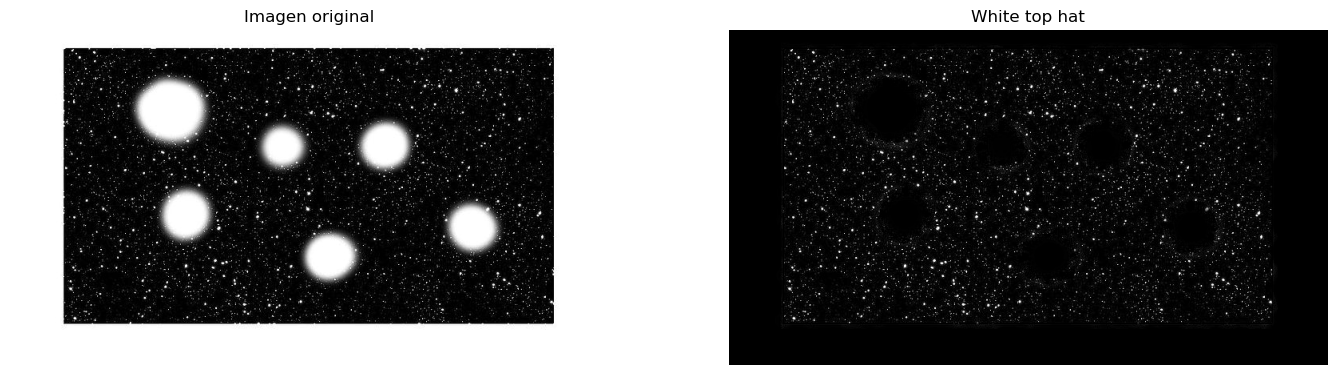

In [18]:
Cosmos_original = imread('Cosmos_original.jpg', as_gray=True)/255

plt.figure(figsize=(17, 8))
plt.subplot(121)
plt.title('Imagen original')
plt.imshow(Cosmos_original, cmap='gray')
plt.axis('Off')

plt.subplot(122)
plt.title('White top hat')
plt.imshow(W_th(Cosmos_original, str_element_1), cmap='gray')
plt.axis('Off')

In [19]:
result=W_th(Cosmos_original, str_element_1)

assert np.sum(result==0)>np.sum(result==1), 'Deberían haber mas 0s que 1s'
assert np.sum(result)<np.sum(Cosmos_original), 'Deberían haber menos elementos brillantes en el white top hat'
assert np.isclose(np.sum(result),8896.75), 'Su implementación no es correcta'

## Dilatación geodésica

La dilatación geodésica consiste en dilatar e intersectar con una máscara iterativamente hasta que dos iteraciones consecutivas sean iguales. Sin embargo, es necesario tener una semilla como inicio para realizar la dilatación consecutiva. En esta ocasión, usaremos como mascara una segmentacíon previamente realizada, y como semilla escogeremos una erosión de la misma mascara con un elemento estructurante grande. El uso de un gran elemento estructurante para la erosión permite que solos obrevivan pixeles de los elementos más grandes de la imagen, estos elementos serán los que recuperaremos con la dilatación geodesica.

### Ejercicio 3:
Cree una función que reciba por parametro la mascara, el elemento estructurante E1 con el que se erosionará y el elemento estructurante E2 con el que se dilatará. Agregue una cantidad maxima de iteraciones para la dilatación para evitar un loop infinito. Esta función debe retornar la cantidad de iteraciones realizadas en la dilatación geodésica y el resultado final.

In [20]:
def geodesic_dilatation(mask, E1,E2,max_iterations):
    # YOUR CODE HERE
    eroded = erosion(mask, footprint=E1)
    result = eroded.copy()
    
    for it in range(1, max_iterations+1):
        
        dilated = dilation(result, footprint=E2)

        new_result = np.logical_and(dilated, mask)
        
        if np.array_equal(result, new_result):
            break
            
        result = new_result.copy()
    
    iterations = it
    result = result.astype(int)
    return result, iterations

(-0.5, 394.5, 262.5, -0.5)

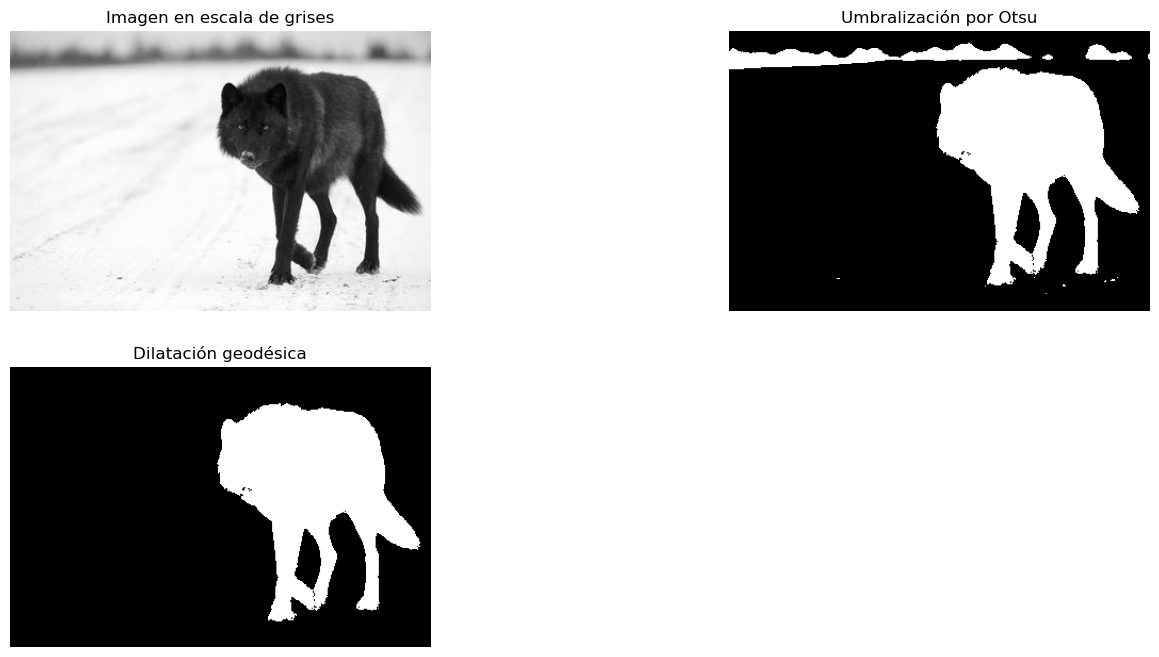

In [21]:
E1=morph.disk(10)
E2=morph.disk(2)
thr_otsu = threshold_otsu(wolf_img_gray)
obj = (wolf_img_gray < thr_otsu).astype(int)

g_d,iterations=geodesic_dilatation(obj,E1,E2,1000)

plt.figure(figsize=(17, 8))
plt.subplot(221)
plt.title("Imagen en escala de grises")
plt.imshow(wolf_img_gray, cmap="gray")
plt.axis('Off')

plt.subplot(222)
plt.title("Umbralización por Otsu")
plt.imshow(obj, cmap="gray")
plt.axis('Off')

plt.subplot(223)
plt.title("Dilatación geodésica")
plt.imshow(g_d, cmap="gray")
plt.axis('Off')

In [22]:
assert np.sum(g_d)<np.sum(g_d==0), 'Deberían haber más elementos de 0 en la dilatación geodesica'
assert iterations==44, 'Sus iteraciones debieron ser 44'
assert np.isclose(np.sum(g_d),20273), 'Su implementación es erronea'

g_d2,iterations2=geodesic_dilatation(obj,morph.disk(20),E2,1000)

assert iterations2==62, 'Sus iteraciones debieron ser 62'
assert np.array_equal(g_d, g_d2), 'El resultado final de la dilatación geodésica debería ser igual con una erosión de disco 10 y 20'